<font color='green' size='6'>**Практическая работа 2**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/competitions/playground-series-s4e10/

**Ваша задача** — предсказать, останется ли клиент с аккаунтом или закроет его (например, уйдёт).

Требования к оформлению:
- Работа должна быть оформлена в jupyter notebook (файл *.ipynb)
- Работа должна содержать комментарии и выводы. Объясняйте почему вы выбрали именно этот способ обработки данных


Всем удачи!





# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='#11a642' size='6'> **Загрузка данных**

In [2]:
# 1. Загрузка датасета
!gdown 1wvqGslWLauKyZxLY-d3RQCTyHCb5wJCO

Downloading...
From: https://drive.google.com/uc?id=1wvqGslWLauKyZxLY-d3RQCTyHCb5wJCO
To: c:\Users\Maks\Documents\Курс\20\train.csv

  0%|          | 0.00/12.4M [00:00<?, ?B/s]
  4%|▍         | 524k/12.4M [00:00<00:04, 2.89MB/s]
 13%|█▎        | 1.57M/12.4M [00:00<00:02, 4.91MB/s]
 21%|██        | 2.62M/12.4M [00:00<00:01, 5.54MB/s]
 30%|██▉       | 3.67M/12.4M [00:00<00:01, 6.03MB/s]
 38%|███▊      | 4.72M/12.4M [00:00<00:01, 6.21MB/s]
 47%|████▋     | 5.77M/12.4M [00:00<00:01, 6.52MB/s]
 55%|█████▌    | 6.82M/12.4M [00:01<00:00, 6.66MB/s]
 64%|██████▎   | 7.86M/12.4M [00:01<00:00, 6.81MB/s]
 72%|███████▏  | 8.91M/12.4M [00:01<00:00, 6.89MB/s]
 81%|████████  | 9.96M/12.4M [00:01<00:00, 6.91MB/s]
 89%|████████▉ | 11.0M/12.4M [00:01<00:00, 6.78MB/s]
 98%|█████████▊| 12.1M/12.4M [00:01<00:00, 6.85MB/s]
100%|██████████| 12.4M/12.4M [00:01<00:00, 6.45MB/s]


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


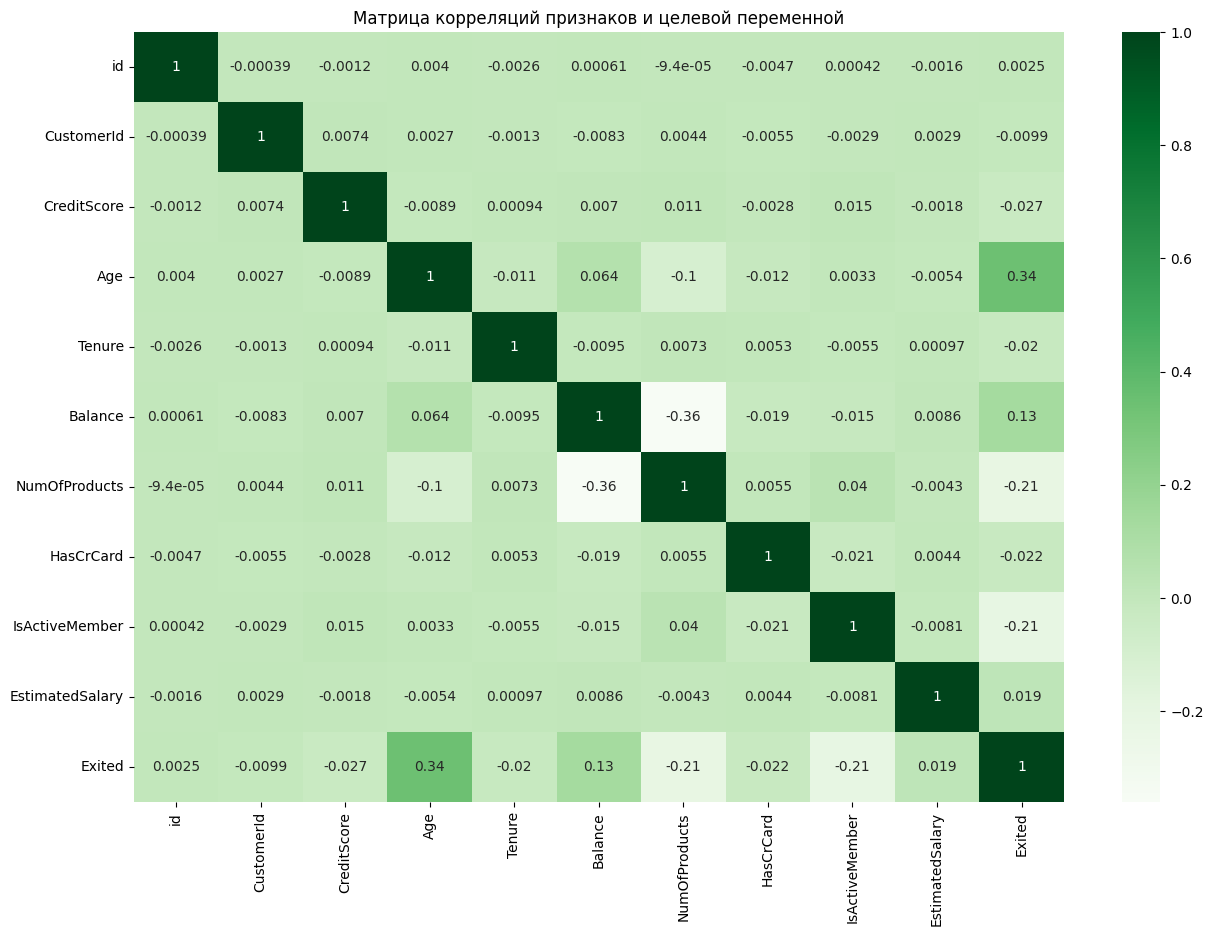

In [5]:
# Посторим тепловую карту линейной корреляции числовых признаков и целевой переменной
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(['Surname', 'Geography', 'Gender'], axis=1).corr(), annot=True, cmap="Greens")
plt.title('Матрица корреляций признаков и целевой переменной')
plt.show()

Как видно из графика, Id и CustomerId не влияют на то, останется ли клиент с аккаунтом или уйдет, поэтому эти признаки мы исключим. Surname (фамилия) тоже не может оказывать влияния на целевую переменную, поэтому ее мы тоже исключим

In [6]:
# 2. Разделение признаков и целевой переменной
X = df.drop(['id', 'CustomerId', 'Exited', 'Surname'], axis=1)
y = df['Exited']

In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

## <font color='#11a642' size='5'> Напишите ответы на следующие вопросы: </font>


1.   К какому типу переменных относится целевой признак?
2.   Какую задачу машинного обучения вам предстоит решить, регрессия или классификация?

# ваш ответ

1. Целевой признак принимает только два значения (0, 1). Значит он относится к бинарному типу переменных
2. Нам предстоит решить задачу бинарной классификации, используя метод логистической регрессии

# <font color='#11a642' size='6'> **Разведочный анализ данных**

## <font color='#11a642' size='5'> Оцените размер вашего датасета  </font>



1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [8]:
# Сколько ГБ ваш датасет
memory_b = df.memory_usage(deep=True).sum()
memory_mb = memory_b / 1024 ** 2
memory_gb = memory_mb / 1024
print('Объем памяти, который занимает дадасет:')
print('Объем памяти в байтах: {:03.3f} B'.format(memory_b))
print('Объем памяти в мегабайтах: {:03.3f} MB'.format(memory_mb))
print('Объем памяти в гигабайтах: {:03.3f} GB'.format(memory_gb))

Объем памяти, который занимает дадасет:
Объем памяти в байтах: 41655470.000 B
Объем памяти в мегабайтах: 39.726 MB
Объем памяти в гигабайтах: 0.039 GB


In [9]:
# Сколько строк и столбцов
num_rows = df.shape[0]
num_columns = df.shape[1]
print('Количество строк:', num_rows)
print('Количество столбцов:', num_columns)

Количество строк: 165034
Количество столбцов: 14


In [10]:
# Определяем категориальные и числовые признаки
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns
print('Категориальные признаки:', list(categorical_features))
print('Числовые признаки:', list(numerical_features))

Категориальные признаки: ['Geography', 'Gender']
Числовые признаки: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


## <font color='#11a642' size='5'> Анализ числовых (непрерывных) признаков


- для каждого признака посчитайте минимум, максимум, среднее, медиану

In [11]:
# Минимум (min), максимум (max), среднее (mean), медиана (50%) для всех признаков

print(X[numerical_features].describe().loc[['mean', 'min', 'max', '50%']])

      CreditScore        Age     Tenure        Balance  NumOfProducts  \
mean   656.454373  38.125888   5.020353   55478.086689       1.554455   
min    350.000000  18.000000   0.000000       0.000000       1.000000   
max    850.000000  92.000000  10.000000  250898.090000       4.000000   
50%    659.000000  37.000000   5.000000       0.000000       2.000000   

      HasCrCard  IsActiveMember  EstimatedSalary  
mean   0.753954         0.49777    112574.822734  
min    0.000000         0.00000        11.580000  
max    1.000000         1.00000    199992.480000  
50%    1.000000         0.00000    117948.000000  


## <font color='#11a642' size='5'> Анализ категориальных признаков


- для каждого признака посчитайте моду, количество уникальных значений

In [12]:
# Мода, количество уникальных значений для категориальных признаков

df_mode = X[categorical_features].mode()
df_unique = X[categorical_features].nunique()
print("Мода:")
print(df_mode)
print("-" * 50)
print('Количество уникальных значений')
print(df_unique)

Мода:
  Geography Gender
0    France   Male
--------------------------------------------------
Количество уникальных значений
Geography    3
Gender       2
dtype: int64


## <font color='#11a642' size='5'> Анализ целевого признака


- какая доля 1?

In [13]:
# Доля 1

proportion_1 = (y == 1).mean() * 100
print(f'Доля 1 составляет: {proportion_1:.2f} %')

Доля 1 составляет: 21.16 %


# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

- нужна ли стратификация?

Стратификация нужна. Она повышает точность результатов

In [14]:
# Разделение данных на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# <font color='#11a642' size='6'> **Подготовка данных к обучению**

## Поиск и анализ выбросов

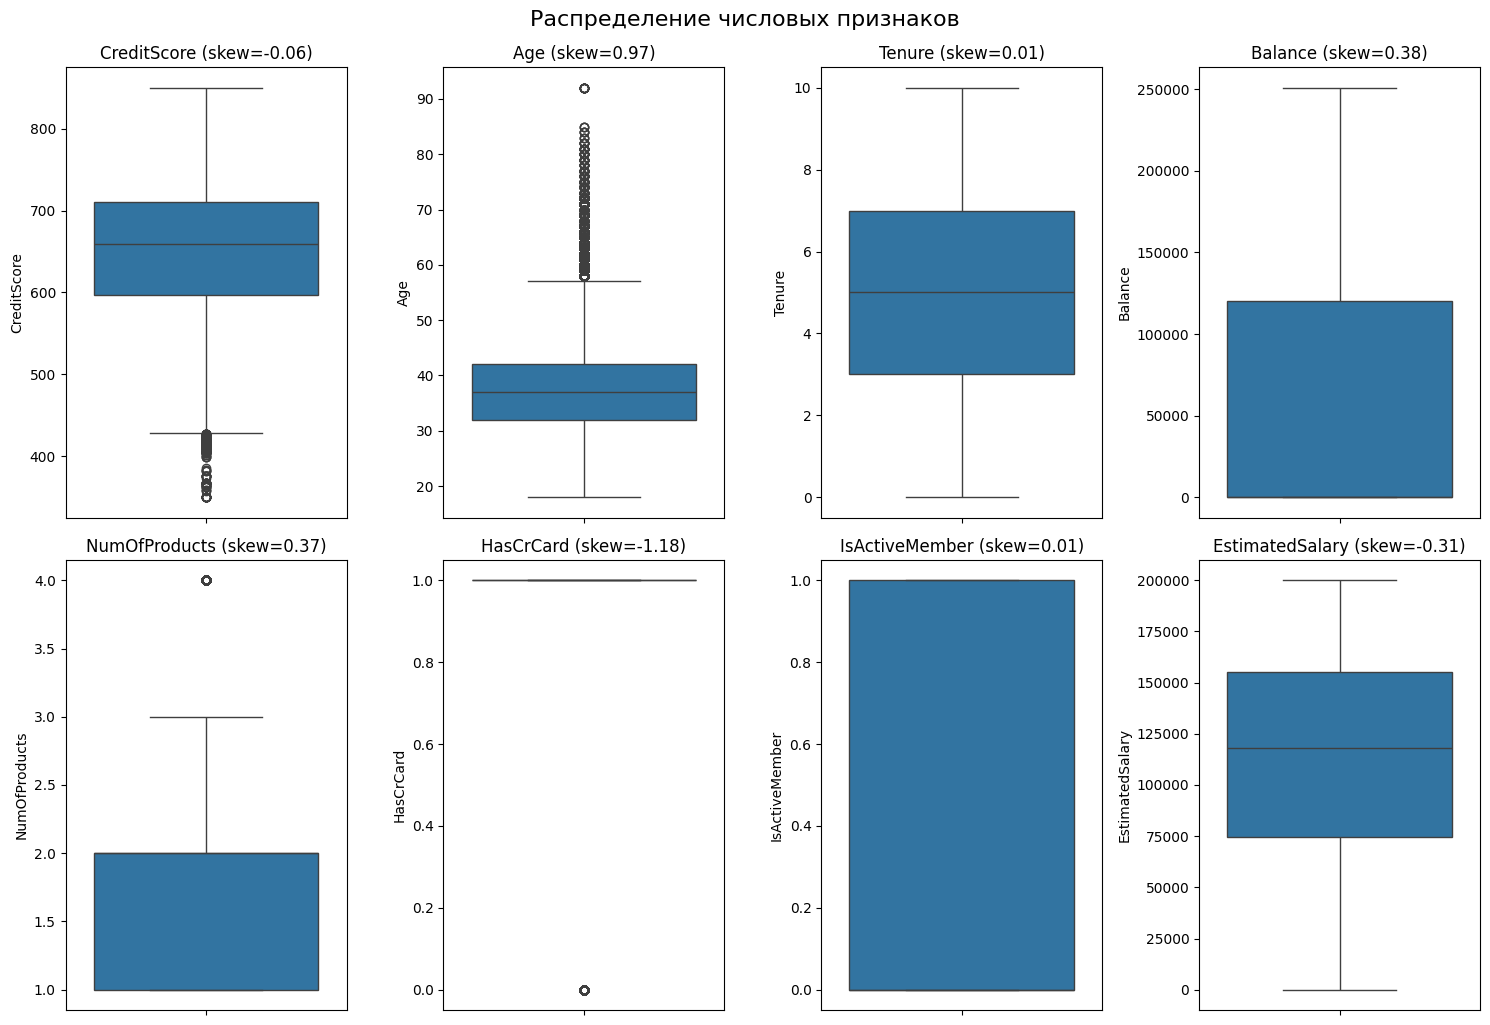

In [15]:
# Визуализация выбросов с помощью boxplot

plt.figure(figsize=(15, 10))
n_cols = len(numerical_features) // 3
n_rows = 3 if len(numerical_features) % 3 == 0 else 4
for i, col in enumerate(numerical_features):
    plt.subplot(n_cols, n_rows, i + 1)
    sns.boxplot(df[col])
    plt.title(f'{col} (skew={df[col].skew():.2f})')
plt.tight_layout()
plt.suptitle("Распределение числовых признаков", fontsize=16, y=1.02)
plt.show()

Как видно на графиках, все выбросы укладываются в нормальные значения, поэтому обрабатывать выбросы мы не будем

## Анализ и обработка пропусков

In [16]:
# Анализ и обработка пропусков

X_train.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Пропуски в нашем датасете отсутствуют

## Анализ и обработка категориальных переменных

In [17]:
# Анализ и обработка категориальных переменных
# Т.к. количество уникальных признаков для категориальных значений не большое, то будем использовать 
# OneHot-кодирование категориальных признаков
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])
ohe_feature_names = ohe.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe_feature_names, index=X_test.index)

# Удаляем старые категориальные, добавляем закодированные
X_train = X_train.drop(columns=['Geography', 'Gender']).join(X_train_encoded_df)
X_test = X_test.drop(columns=['Geography', 'Gender']).join(X_test_encoded_df)

## Масштабирование числовых признаков

In [18]:
# Масштабирование числовых признаков

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# <font color='#11a642' size='6'> **Построение моделей машинного обучения**

## <font color='#11a642' size='5'> Построение логистической регрессии

In [19]:
# Построение логистической регрессии

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## <font color='#11a642' size='5'> Построение логистической регрессии с регуляризацией
> можно использовать [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), настроив гиперпараметры penalty и C

In [20]:
# Построение логистической регрессии с регуляризацией

clf = LogisticRegression(penalty='l2', C = 1, solver='liblinear', random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(C=1, random_state=42, solver='liblinear')

### <font color='#11a642' size='4'> Оценка качества  всех моделей


In [21]:
# Получение вероятностей логистической регрессии
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

In [22]:
# Получение вероятностей логистической регрессии с регуляризацией

y_clf_pred_train = clf.predict_proba(X_train)[:,1]
y_clf_pred_test = clf.predict_proba(X_test)[:,1]
y_clf_pred = clf.predict(X_test)

In [26]:
# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
accuracy_clf = accuracy_score(y_test, y_clf_pred)
precision = precision_score(y_test, y_pred)
precision_clf = precision_score(y_test, y_clf_pred)
recall = recall_score(y_test, y_pred)
recall_clf = recall_score(y_test, y_clf_pred)
f1 = f1_score(y_test, y_pred)
f1_clf = f1_score(y_test, y_clf_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_clf = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Вывод результатов
print(f'Accuracy логистической регрессии: {accuracy:.2f}')
print(f'Accuracy логистической регрессии с регуляризацией: {accuracy_clf:.2f}')
print(f'Precision логистической регрессии: {precision:.2f}')
print(f'Precision логистической регрессии с регуляризацией: {precision_clf:.2f}')
print(f'Recall логистической регрессии: {recall:.2f}')
print(f'Recall логистической регрессии с регуляризацией: {recall_clf:.2f}')
print(f'F1-score логистической регрессии: {f1:.2f}')
print(f'F1-score логистической регрессии с регуляризацией: {f1_clf:.2f}')
print(f'ROC-AUC логистической регрессии: {roc_auc:.3f}')
print(f'ROC-AUC логистической регрессии с регуляризацией: {roc_auc_clf:.3f}')

Accuracy логистической регрессии: 0.83
Accuracy логистической регрессии с регуляризацией: 0.83
Precision логистической регрессии: 0.69
Precision логистической регрессии с регуляризацией: 0.69
Recall логистической регрессии: 0.38
Recall логистической регрессии с регуляризацией: 0.38
F1-score логистической регрессии: 0.49
F1-score логистической регрессии с регуляризацией: 0.49
ROC-AUC логистической регрессии: 0.815
ROC-AUC логистической регрессии с регуляризацией: 0.815


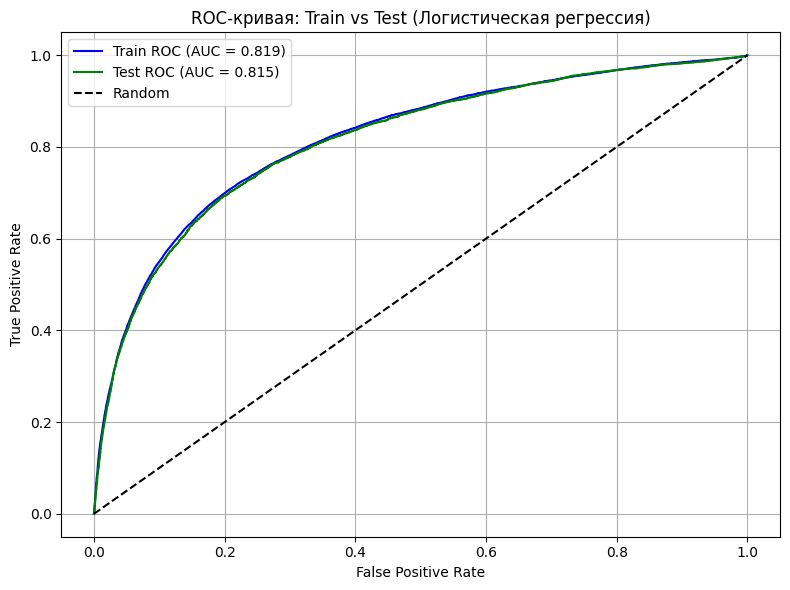

In [27]:
# ROC-кривая + AUC логистической регрессии
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

# Построение ROC-графика
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.3f})", color="blue")
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.3f})", color="green")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая: Train vs Test (Логистическая регрессия)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

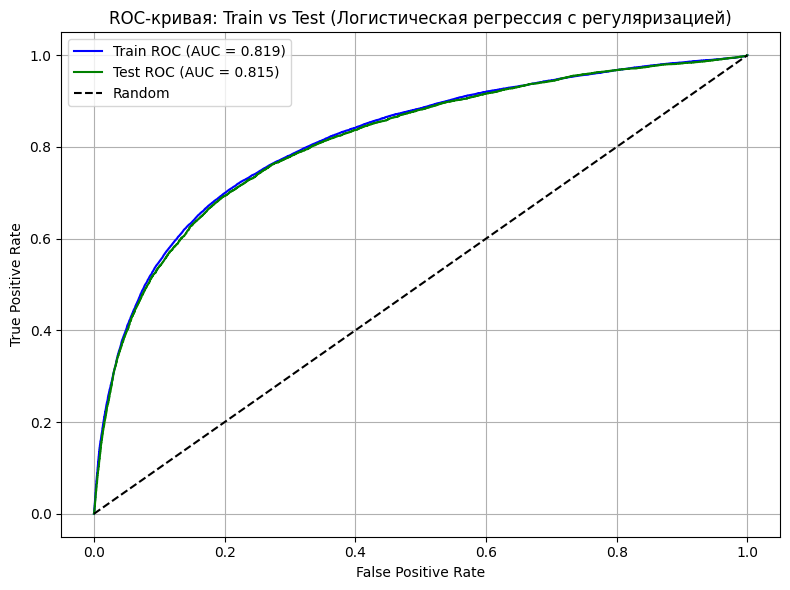

In [28]:
# ROC-кривая + AUC логистической регресси с регуляризацией
fpr_train, tpr_train, _ = roc_curve(y_train, y_clf_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_clf_pred_test)

auc_train = roc_auc_score(y_train, y_clf_pred_train)
auc_test = roc_auc_score(y_test, y_clf_pred_test)

# Построение ROC-графика
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.3f})", color="blue")
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.3f})", color="green")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая: Train vs Test (Логистическая регрессия с регуляризацией)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# <font color='#11a642' size='4'> Ваши выводы
- какую из моделей вы рекомендуете использовать для прогноза? Почему?



ВАШ ОТВЕТ

Как видно из результатов, обе модели показали одинаковые метрики качества. Лучше использовать модель с регуляризацией. Это поможет избежать переобучения модели